# Module 3 1D Convnet

In [0]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
MAX_WORDS = 20000

# Cut texts after this number of words 
MAX_LEN = 80

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_WORDS)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=MAX_LEN)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=MAX_LEN)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(MAX_WORDS,128,input_length=MAX_LEN))
model.add(Conv1D(32,7,activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32,7,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 128)           2560000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 74, 32)            28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 32)             7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,595,937
Trainable params: 2,595,937
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 40s 2ms/step - loss: 0.5715 - acc: 0.7378 - val_loss: 0.5127 - val_acc: 0.7880
Epoch 2/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.4475 - acc: 0.7943 - val_loss: 0.6668 - val_acc: 0.7231
Epoch 3/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.3439 - acc: 0.7437 - val_loss: 0.7989 - val_acc: 0.6679
Epoch 4/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.2263 - acc: 0.5928 - val_loss: 1.0664 - val_acc: 0.5321
Epoch 5/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.1574 - acc: 0.3477 - val_loss: 1.4938 - val_acc: 0.3886
Epoch 6/10
25000/25000 [==============================] - 39s 2ms/step - loss: 0.1354 - acc: 0.2014 - val_loss: 1.8543 - val_acc: 0.2840
Epoch 7/10
25000/25000 [=======

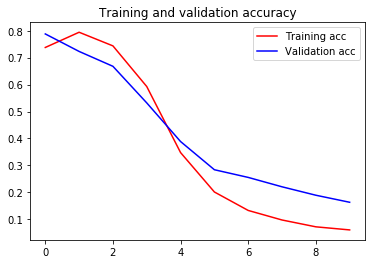

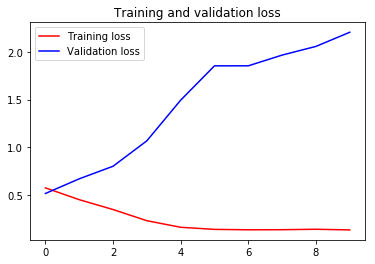

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Combine 1D Convnet and RNN

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, GRU
from keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(MAX_WORDS,32,input_length=MAX_LEN))
model.add(Conv1D(16,7,activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32,7,activation='relu'))
model.add(GRU(32))
model.add(Dense(1))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 80, 32)            640000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 74, 16)            3600      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 14, 16)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 8, 32)             3616      
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 653,489
Trainable params: 653,489
Non-trainable params: 0
________________________________________________

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 18s 710us/step - loss: 0.5685 - acc: 0.7444 - val_loss: 0.4923 - val_acc: 0.8098
Epoch 2/10
25000/25000 [==============================] - 17s 666us/step - loss: 0.4582 - acc: 0.8321 - val_loss: 0.5119 - val_acc: 0.8098
Epoch 3/10
25000/25000 [==============================] - 17s 672us/step - loss: 0.4127 - acc: 0.8432 - val_loss: 0.6099 - val_acc: 0.7811
Epoch 4/10
25000/25000 [==============================] - 17s 676us/step - loss: 0.3426 - acc: 0.7821 - val_loss: 0.8323 - val_acc: 0.7163
Epoch 5/10
25000/25000 [==============================] - 17s 672us/step - loss: 0.2531 - acc: 0.6096 - val_loss: 1.4504 - val_acc: 0.4841
Epoch 6/10
25000/25000 [==============================] - 17s 676us/step - loss: 0.2057 - acc: 0.3690 - val_loss: 2.7686 - val_acc: 0.2248
Epoch 7/10
25000/25000 [==============================] - 17s 669us/step - loss: 0.1806 - acc: 0.1649 - val_loss: 2.

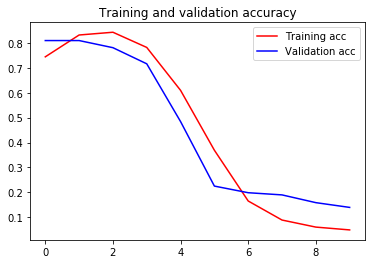

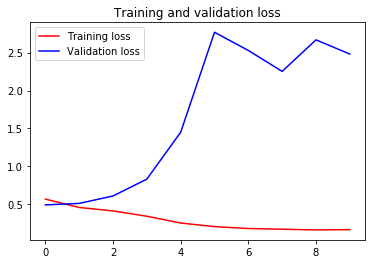

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()